<a href="https://colab.research.google.com/github/KaroAntonio/dsc/blob/master/Unit%2011%20-%20Python%20Statistics%20in%20EDA/11.1%20Frequentist%20Case%20Study/Frequentist%20Inference%20Case%20Study%20-%20Part%20B%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions.

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

In [55]:
# Clone my fork of the case study into Colab
!git clone https://github.com/karoantonio/dsc.git

Cloning into 'dsc'...
remote: Enumerating objects: 621, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 621 (delta 125), reused 97 (delta 95), pack-reused 442
Receiving objects: 100% (621/621), 46.95 MiB | 28.43 MiB/s, done.
Resolving deltas: 100% (222/222), done.


In [56]:
%ls dsc/'Unit 11 - Python Statistics in EDA'/'11.1 Frequentist Case Study'/

 DS_Store
'Frequentist Inference Case Study - Part A (3).ipynb'
'Frequentist Inference Case Study - Part B (2).ipynb'
 insurance2.csv


In [57]:
# cd into the Notebooks dir so that imports work properly
%cd dsc/'Unit 11 - Python Statistics in EDA'/'11.1 Frequentist Case Study'/

/content/dsc/Unit 11 - Python Statistics in EDA/11.1 Frequentist Case Study/dsc/Unit 11 - Python Statistics in EDA/11.1 Frequentist Case Study


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [59]:
medical.shape

(1338, 8)

In [60]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [61]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [62]:
medical['insuranceclaim'].unique()

array([1, 0])

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

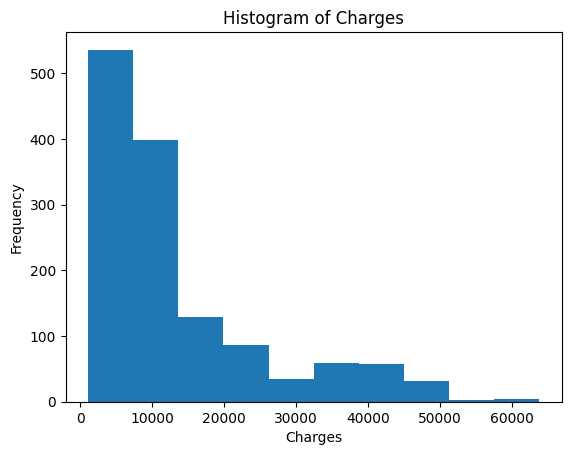

In [63]:
plt.hist(medical['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.show()

In [64]:
mean = medical['charges'].mean()
std = medical['charges'].std()
print(f'Mean: {mean}')
print(f'Standard Deviation: {std}')

# The mean does not strongly capture the centrality of the center of the distribution due to the long right tail
# The Std does not accurately represent either direction from the mean, as most of the datapoints lie to the left of the mean within the 1st std to the left.
# The 'Rules' of the std do not apply because this is not a normal dist. For ex: approximately 68% of the data does NOT fall within one standard deviation of the mean.

Mean: 13270.422265141257
Standard Deviation: 12110.011236694001


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
We want to determine how different the mean of the sample  is from the mean of the actual population of patients so we know how confident we can be of the actual mean of the patient charges.  
Given that the dataset is a random sample from our population, we can use
The sample size of 1338 is relatively arge, and the sample distribution is not a normal distribution, so a t-test is the appropriate test to use.   



__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Considering that we want to determine if the mean is greater than 12000,
we are concerned with CI95% of the lower bound of the mean. This way we can see if 12000 falls within the lower CI95% bound. So we want to use the one-sided, lower bounded CI95%.

In [91]:
# Calculate the one-sided 95% CI of the mean of the population

def calc_one_sided_CI(sample, percentage):

  charges = medical['charges']

  sample_n = charges.shape[0]
  sample_mean = charges.mean()
  sample_std = charges.std(ddof=1)

  alpha = 1 - percentage
  df = sample_n - 1
  # This is the one-sided t-critical
  t_critical = t.ppf(1 - alpha, df)

  margin_of_error = t_critical * (sample_std / np.sqrt(sample_n))

  lower_bound = sample_mean - margin_of_error
  return lower_bound, margin_of_error

charges = medical['charges']
lower_bound, margin_of_error = calc_one_sided_CI(charges, 0.95)

# The 95% CI extends only as low as 12725, hence we can be 95% certain that the mean is greater than this value
print(f'Margin of Error: {margin_of_error}')
print(f'(Lower Bound of 95% CI, Mean): {(lower_bound, charges.mean())}')

Margin of Error: 544.9350813250254
(Lower Bound of 95% CI, Mean): (12725.48718381623, 13270.422265141257)


In [95]:
lower_bound, margin_of_error = calc_one_sided_CI(charges, 0.999)

# We can be 99.9% certain that the mean is greater than 12245
print(f'Margin of Error: {margin_of_error}')
print(f'(Lower Bound of 99.9% CI, Mean): {(lower_bound, charges.mean())}')

Margin of Error: 1025.097127008884
(Lower Bound of 99.9% CI, Mean): (12245.325138132372, 13270.422265141257)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

__A:__   
H0 : People with insurance are not charged any differently from people without insurance, the means for both groups is the same with 95% confidence.   
H1 : People with insurance are charged differently compared to people with insurance, the means for both groups are significantly different.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

In [82]:
# Manually perform t-test
no_ins_sample = medical[medical['insuranceclaim'] == 1]['charges']
ins_sample = medical[medical['insuranceclaim'] == 0]['charges']

n0 = len(no_ins_sample)
n1 = len(ins_sample)
s0 = no_ins_sample.std(ddof=1)
s1 = ins_sample.std(ddof=1)

# pooled std
s_p = np.sqrt(((n0 - 1) * s0 ** 2 + (n1 - 1) * s1 ** 2) / (n0 + n1 - 2))

t_stat = float(no_ins_sample.mean() - ins_sample.mean()) / (s_p * np.sqrt(1 / n0 + 1 / n1))

print(f'Manual T Statistic: {t}')

Manual T Statistic: <scipy.stats._continuous_distns.t_gen object at 0x7b9ba7933ac0>


In [81]:
# Calculate the P-value
df = n0 + n1 - 2

p_val = 2 * (1 - t.cdf(abs(t_stat), df))
print(f'Manual P Value: {p_val}')

Manual P Value: 0.0


In [72]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(no_ins_sample, ins_sample)
print(f'T Statistic:: {t_statistic}')
print(f'P Value:: {p_value}')

T Statistic:: 11.893299030876712
P Value:: 4.461230231620717e-31


In [65]:
# The P-Values are both essentially 0, as we interpret them as probabilities that we would observe H0
# The T stat for both methods is 11.89 so there is in fact a difference in the amount charged to those with insurance vs those without.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [89]:
scipy.stats?

__A:__ There doesn't seem to be a ztest function in scipy.stats. This might be because the ttest covers most use cases that the ztest would be useful for.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test